# WSI LAB07 Klasyfikator Bayes'a


### Miłosz Cieśla 325154 <br>

### Cele eksperymentu

- Sprawdzenie poprawności implementacji algorytmu naiwnego klasyfikatora
Bayesa.
- Zbadanie jakości za pomocą podziału na zbiór trenujący, walidacyjny i testowy.
- Zbadanie jakości za pomocą k-krotnej walidacji krzyżowej.

### Potrzebne importy

In [1]:
from mySolver import MySolver
from testingUtils import readCSV, compareAccuracy, pltAcc, getCrossValData, getValData
import pandas as pd
import numpy as np
X, Y = readCSV("cardio_train.csv")

### Poprawność algorytmu:
Aby ustalić czy moja implementacja jest poprawna, porównuje średnie wyniki uzyskane z 50 cykli treningowych po których następuje przewidywanie.

In [15]:

meanMS, meanSK, stdMS, stdSK = compareAccuracy(X, Y, 50, 0.3)
data = {
    '': ['Mean', 'Standard Deviation'],
    'MySolver': [meanMS, stdMS],
    'skLearn': [meanSK, stdSK]
}
df = pd.DataFrame(data)
df

,,MySolver,skLearn
0,Mean,59.273051,59.261796
1,Standard Deviation,0.759196,0.772759


Jak możemy zauważyć wyniki są do siebie bardzo zbliżone. Co potwierdza, że algorytm działa w zamierzony sposób.

### Badanie jakości za pomocą k-krotnej walidacji krzyżowej 

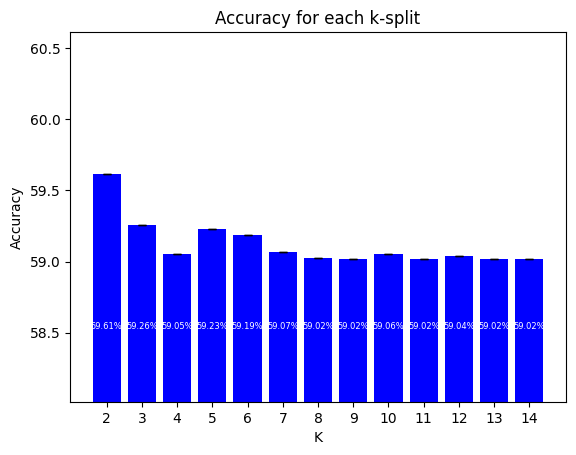

In [2]:
data = getCrossValData(X, Y, 15, 10)
pltAcc([i + 2 for i in range(len(data))], data, "Accuracy for each k-split", "K", "Accuracy")

### Badanie jakości za pomocą podziału na zbiór trenujący i testowy

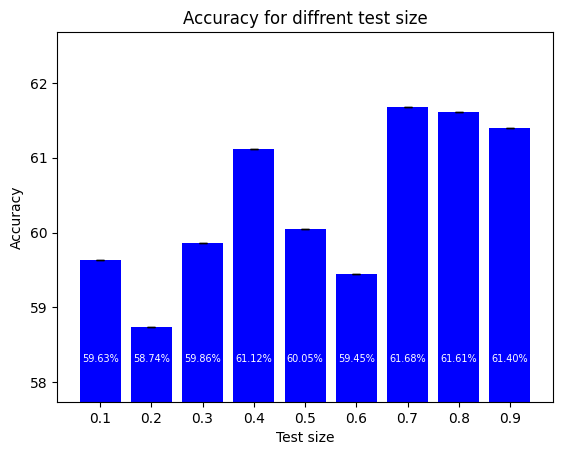

In [2]:
splits = np.arange(0.1, 1.0, 0.1)
data = getValData(X, Y, splits, 50)
pltAcc(splits, data, "Accuracy for different test size", "Test size", "Accuracy")